# Randomness



## Randomness

We will use the `numpy.random` package to simulate randomness in Python.

This lecture will present various probability distributions and then use
numpy.random to numerically verify some of the facts associated with them.

We import `numpy` as usual

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Probability

Before we learn how to use Python to generate randomness, we should make sure
that we all agree on some basic concepts of probability.

To think about the probability of some event occurring, we must understand what possible
events could occur – mathematicians refer to this as the *event space*.

Some examples are

- For a coin flip, the coin could either come up heads, tails, or land on its side.  
- The inches of rain falling in a certain location on a given day could be any real
  number between 0 and $ \infty $.  
- The change in an S&P500 stock price could be any real number between
  $ - $ opening price and $ \infty $.  
- An individual’s employment status tomorrow could either be employed or unemployed.  
- And the list goes on…  


Notice that in some of these cases, the event space can be counted (coin flip and employment status)
while in others, the event space cannot be counted (rain and stock prices).

We refer to random variables with countable event spaces as *discrete random variables* and
random variables with uncountable event spaces as *continuous random variables*.

We then call certain numbers ‘probabilities’ and associate them with events from the event space.

The following is true about probabilities.

1. The probability of any event must be greater than or equal to 0.  
1. The probability of all events from the event space must sum (or integrate) to 1.  
1. If two events cannot occur at same time, then the probability that at least one of them occurs is
  the sum of the probabilities that each event occurs (known as independence).  


We won’t rely on these for much of what we learn in this class, but occasionally, these facts will
help us reason through what is happening.

### Simulating Randomness in Python

One of the most basic random numbers is a variable that has equal probability of being any value
between 0 and 1.

You may have previously learned about this probability distribution as the Uniform(0, 1).

Let’s dive into generating some random numbers.

Run the code below multiple times and see what numbers you get.

In [2]:
np.random.rand()

0.26322078037408503

We can also generate arrays of random numbers.

In [3]:
np.random.rand(25)

array([0.36061623, 0.31242872, 0.58326892, 0.12558815, 0.4620187 ,
       0.28782051, 0.86257915, 0.12084517, 0.48935707, 0.34140173,
       0.43616953, 0.68828897, 0.28233537, 0.14272351, 0.81286462,
       0.01981704, 0.64797694, 0.53591264, 0.73331375, 0.82929317,
       0.04086537, 0.9026042 , 0.46869886, 0.97426673, 0.74099426])

In [4]:
np.random.rand(5, 5)

array([[0.46186911, 0.41821968, 0.36160953, 0.0502781 , 0.65090345],
       [0.3453095 , 0.33421571, 0.18455346, 0.12076724, 0.33032191],
       [0.96943319, 0.83328017, 0.29883387, 0.02172205, 0.95632056],
       [0.60151453, 0.82389585, 0.28551458, 0.10728677, 0.59717758],
       [0.14576191, 0.07277934, 0.40452115, 0.40554952, 0.2340937 ]])

In [5]:
np.random.rand(2, 3, 4)

array([[[0.93536126, 0.93549655, 0.12436692, 0.1469521 ],
        [0.52973566, 0.4896827 , 0.46753372, 0.81619532],
        [0.48423212, 0.2639579 , 0.36469924, 0.08819488]],

       [[0.23417584, 0.96875075, 0.4692465 , 0.25405469],
        [0.72950201, 0.18430778, 0.81660447, 0.01637793],
        [0.63715744, 0.8559052 , 0.92731636, 0.15972547]]])

### Why Do We Need Randomness?

As economists and data scientists, we study complex systems.

These systems have inherent randomness, but they do not readily reveal their underlying distribution
to us.

In cases where we face this difficulty, we turn to a set of tools known as Monte Carlo
methods.

These methods effectively boil down to repeatedly simulating some event (or events) and looking at
the outcome distribution.

This tool is used to inform decisions in search and rescue missions, election predictions, sports,
and even by the Federal Reserve.

The reasons that Monte Carlo methods work is a mathematical theorem known as the *Law of Large
Numbers*.

The Law of Large Numbers basically says that under relatively general conditions, the distribution of simulated outcomes will mimic the true distribution as the number of simulated events goes to infinity.

We already know how the uniform distribution looks, so let’s demonstrate the Law of Large Numbers by approximating the uniform distribution.

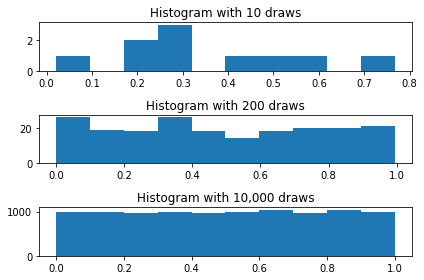

In [6]:
# Draw various numbers of uniform[0, 1] random variables
draws_10 = np.random.rand(10)
draws_200 = np.random.rand(200)
draws_10000 = np.random.rand(10_000)

# Plot their histograms
fig, ax = plt.subplots(3)

ax[0].set_title("Histogram with 10 draws")
ax[0].hist(draws_10)

ax[1].set_title("Histogram with 200 draws")
ax[1].hist(draws_200)

ax[2].set_title("Histogram with 10,000 draws")
ax[2].hist(draws_10000)

fig.tight_layout()

### Discrete Distributions 

Sometimes we will encounter variables that can only take one of a
few possible values.

We refer to this type of random variable as a discrete distribution.

For example, consider a small business loan company.

Imagine that the company’s loan requires a repayment of $ \\$25,000 $ and must be repaid 1 year
after the loan was made.

The company discounts the future at 5%.

Additionally, the loans made are repaid in full with 75% probability, while
$ \\$12,500 $ of loans is repaid with probability 20%, and no repayment with 5%
probability.

How much would the small business loan company be willing to loan if they’d like to
– on average – break even?

In this case, we can compute this by hand:

The amount repaid, on average, is: $ 0.75(25,000) + 0.2(12,500) + 0.05(0) = 21,250 $.

Since we’ll receive that amount in one year, we have to discount it:
$ \frac{1}{1+0.05} 21,250 \approx 20238 $.

We can now verify by simulating the outcomes of many loans.

In [7]:
# You'll see why we call it `_slow` soon :)
def simulate_loan_repayments_slow(N, r=0.05, repayment_full=25_000.0,
                                  repayment_part=12_500.0):
    repayment_sims = np.zeros(N)
    for i in range(N):
        x = np.random.rand()  # Draw a random number

        # Full repayment 75% of time
        if x < 0.75:
            repaid = repayment_full
        elif x < 0.95:
            repaid = repayment_part
        else:
            repaid = 0.0

        repayment_sims[i] = (1 / (1 + r)) * repaid

    return repayment_sims

print(np.mean(simulate_loan_repayments_slow(25_000)))

20208.571428571428


#### Aside: The extreme benefits of Vectorized Computations

The code above illustrates the concepts we were discussing but is much slower than
necessary.

Below is a version of our function that uses numpy arrays to perform computations
instead of only storing the values.

In [8]:
def simulate_loan_repayments(N, r=0.05, repayment_full=25_000.0,
                             repayment_part=12_500.0):
    """
    Simulate present value of N loans given values for discount rate and
    repayment values
    """
    random_numbers = np.random.rand(N)

    # start as 0 -- no repayment
    repayment_sims = np.zeros(N)

    # adjust for full and partial repayment
    partial = random_numbers <= 0.20
    repayment_sims[partial] = repayment_part

    full = ~partial & (random_numbers <= 0.95)
    repayment_sims[full] = repayment_full

    repayment_sims = (1 / (1 + r)) * repayment_sims

    return repayment_sims

np.mean(simulate_loan_repayments(25_000))

20240.952380952378

We’ll quickly demonstrate the time difference in running both function versions.

In [9]:
%timeit simulate_loan_repayments_slow(250_000)

114 ms ± 1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
%timeit simulate_loan_repayments(250_000)

4.2 ms ± 80.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


The timings for my computer were 1114 ms for `simulate_loan_repayments_slow` and 4.2 ms for
`simulate_loan_repayments`.

This function is simple enough that both times are acceptable, but the 33x time difference could
matter in a more complicated operation.

This illustrates a concept called *vectorization*, which is when computations
operate on an entire array at a time.

In general, numpy code that is *vectorized* will perform better than numpy code that operates on one
element at a time.



### Continuous Distributions

Recall that a continuous distribution is one where the value can take on an uncountable number of values.

It differs from a discrete distribution in that the events are not
countable.

We can use simulation to learn things about continuous distributions as we did with discrete
distributions.

Let’s use simulation to study what is arguably the most commonly encountered
distributions – the normal distribution.

The Normal (sometimes referred to as the Gaussian distribution) is bell-shaped and completely
described by the mean and variance of that distribution.

The mean is often referred to as $ \mu $ and the variance as $ \sigma^2 $.

Let’s take a look at the normal distribution.

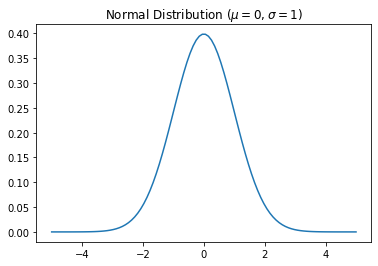

In [3]:
# scipy is an extension of numpy, and the stats
# subpackage has tools for working with various probability distributions
import scipy.stats as st

x = np.linspace(-5, 5, 100)

# NOTE: first argument to st.norm is mean, second is standard deviation sigma (not sigma^2)
pdf_x = st.norm(0.0, 1.0).pdf(x)

fig, ax = plt.subplots()

ax.set_title(r"Normal Distribution ($\mu = 0, \sigma = 1$)")
ax.plot(x, pdf_x)

You can use the `isf` method to get the inverst cumulative density function of the distribution and recover the threshold associated with a particular probability mass in the tails

Here you passe the probability, say 5% and the function returns the threshold so there is exactly this probability mass to the right of it.

In [4]:
# right tail
st.norm(0.,1.).isf(0.05)

1.6448536269514729

In [5]:
# left tail
st.norm(0.,1.).isf(0.95)

-1.6448536269514722

And you can obvioulsy simulate as well

Here I simualte a standard normal vector with 3 rows and 4 columns

In [7]:
st.norm(0.,1.).rvs(size=(3,4))

array([[ 1.13160612, -0.92851574,  0.58124439,  0.08951373],
       [-2.3742675 ,  0.58547661, -1.65111211, -0.907758  ],
       [-0.3837965 , -0.07018039, -1.58686045, -1.61535419]])

Here a column vector

In [8]:
st.norm(0.,1.).rvs(size=10)

array([ 0.24974533,  1.33131625, -0.40291307, -0.63344796,  0.45303482,
       -1.48533287, -1.5274221 , -0.75680562, -0.46783371,  0.13708141])

You can also this to compute means (in the case of the normal is silly)

In [9]:
st.norm(0.,1.).mean()

0.0

In [10]:
st.norm(0.,1.).std()

1.0

But also higher order moments!

In [12]:
# kurtosis!
st.norm(0.,1.).moment(4)

3.0